In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import requests
warnings.filterwarnings("ignore")

In [2]:
url = "https://www.data.gov.in/files/ogdpv2dms/s3fs-public/NRSC-rainfall-districtwise-jan22_0.csv"
response = requests.get(url)

In [3]:
from io import StringIO
csv_data = StringIO(response.text)
df = pd.read_csv(csv_data)

In [4]:
df.shape

(21257, 7)

The dataset has 21,257 rows and 7 columns.

In [5]:
#df.head(5)
# Use sample as it tells random datasets
df.sample(5)

,State,District,Date,Year,Month,Avg_rainfall,Agency_name
19967,Uttar Pradesh,Shahjahanpur,2022-01-17,2022,1,0.000000,NRSC VIC MODEL
6159,Himachal Pradesh,Bilaspur,2022-01-13,2022,1,0.051463,NRSC VIC MODEL
17548,Telangana,Ranjanna Sircilla,2022-01-05,2022,1,0.000000,NRSC VIC MODEL
17525,Telangana,Rangareddy,2022-01-11,2022,1,0.002304,NRSC VIC MODEL
10045,Madhya Pradesh,Narshimapura,2022-01-13,2022,1,0.000000,NRSC VIC MODEL


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21257 entries, 0 to 21256
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         21257 non-null  object 
 1   District      21257 non-null  object 
 2   Date          21257 non-null  object 
 3   Year          21257 non-null  int64  
 4   Month         21257 non-null  int64  
 5   Avg_rainfall  21257 non-null  float64
 6   Agency_name   21257 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.1+ MB


The data contains 7 columns which are:
- Categorical Columns
    1. State: string
    2. District: string
    3. Date: string
    4. Agency_name: string
- Numerical Columns
    1. Year: int
    2. Month: int
    3. Avg_rainfall: float


In [7]:
df.isnull().sum()

State           0
District        0
Date            0
Year            0
Month           0
Avg_rainfall    0
Agency_name     0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

There are no null values nor duplicate values in the dataset

In [9]:
df.describe()

,Year,Month,Avg_rainfall
count,21257.0,21257.0,21257.000000
mean,2022.0,1.0,2.126571
std,0.0,0.0,7.979154
min,2022.0,1.0,-0.134380
25%,2022.0,1.0,0.000000
50%,2022.0,1.0,0.000267
75%,2022.0,1.0,0.290856
max,2022.0,1.0,263.062257


- The average rainfall is 2.125mm.
- Maximun rainfall is 263.062mm.

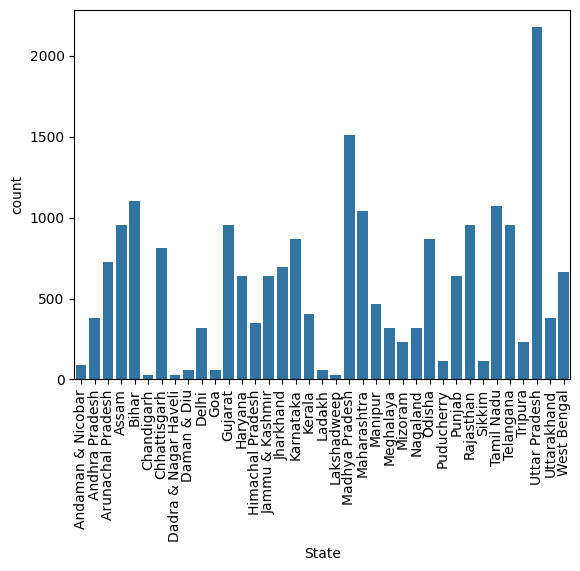

In [10]:
sns.countplot(x='State', data=df)
plt.xticks(rotation=90) 
plt.show()

In [11]:
df['State'].value_counts()

State
Uttar Pradesh           2175
Madhya Pradesh          1508
Bihar                   1102
Tamil Nadu              1073
Maharashtra             1044
Rajasthan                957
Assam                    957
Telangana                957
Gujarat                  957
Karnataka                870
Odisha                   870
Chhattisgarh             812
Arunachal Pradesh        725
Jharkhand                696
West Bengal              667
Jammu & Kashmir          638
Haryana                  638
Punjab                   638
Manipur                  464
Kerala                   406
Andhra Pradesh           377
Uttarakhand              377
Himachal Pradesh         348
Delhi                    319
Meghalaya                319
Nagaland                 319
Tripura                  232
Mizoram                  232
Sikkim                   116
Puducherry               116
Andaman & Nicobar         87
Goa                       58
Daman & Diu               58
Ladakh                    58
Lakshadw

- Uttar Pradesh has 2175 states whose data has been collected being the maximum. 
- Lakshadweep, Dadar & Nagar Haveli and Chandigarh have 29 districts covered being the minimum.

In [12]:
df['District'].value_counts()

District
Pratapgarh        58
Hamirpur          58
Balrampur         58
West              58
East              58
                  ..
Deoghar           29
Dhanbad           29
Dumka             29
East Singhbhum    29
Uttar Dinajpur    29
Name: count, Length: 725, dtype: int64

- Maximum recorded districts are Pratapgarh, Hamirpur, Balrampur, West, East, 58 times.
- Maximum recorded districts are Deoghar, Dhanbad, Dumka, East Singhbhum, Uttar Dinajpur, 29 times.

In [13]:
df = df.drop('Agency_name', axis=1) #Dropped Agency name column bcz it wasn't giving any information

In [14]:
df.tail(5)

,State,District,Date,Year,Month,Avg_rainfall
21252,West Bengal,Uttar Dinajpur,2022-01-26,2022,1,0.000071
21253,West Bengal,Uttar Dinajpur,2022-01-27,2022,1,0.000708
21254,West Bengal,Uttar Dinajpur,2022-01-28,2022,1,0.000142
21255,West Bengal,Uttar Dinajpur,2022-01-29,2022,1,0.000000
21256,West Bengal,Uttar Dinajpur,2022-01-30,2022,1,0.000000


In [15]:
max_rain_date = df.groupby('Date')['Avg_rainfall'].sum().idxmax()
max_rain_amount = df.groupby('Date')['Avg_rainfall'].sum().max()

print(f"Date with maximum rainfall: {max_rain_date} ({max_rain_amount} units)")

Date with maximum rainfall: 2022-01-08 (7445.851234854 units)


In [16]:
min_rain_date = df.groupby('Date')['Avg_rainfall'].sum().idxmin()
min_rain_amount = df.groupby('Date')['Avg_rainfall'].sum().min()
print(f"Date with maximum rainfall: {min_rain_date} ({min_rain_amount} units)")

Date with maximum rainfall: 2022-01-29 (14.947391686 units)


In [17]:
df['Month'].unique()

array([1])

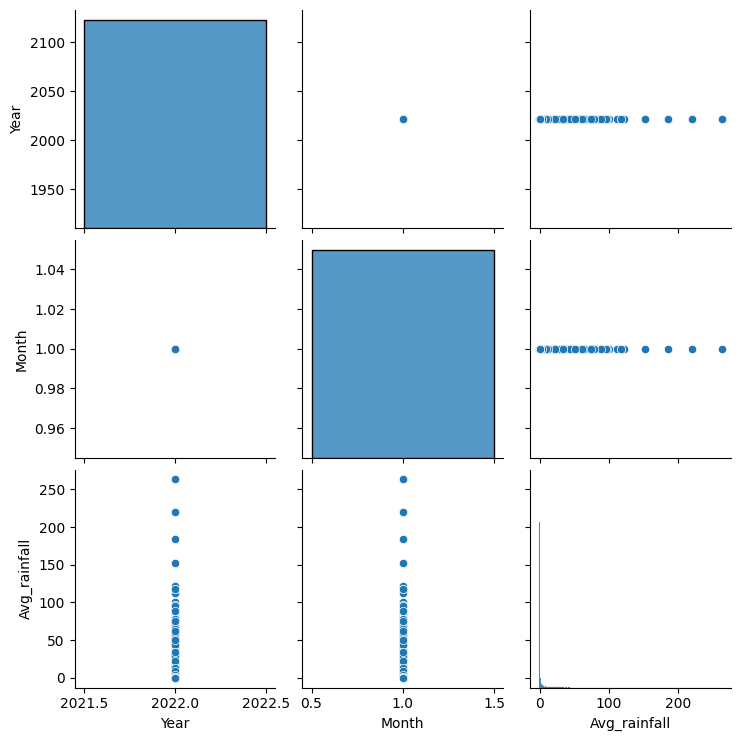

In [18]:
sns.pairplot(data=df)

In [ ]:
pip install pandas-profiling

: 

In [21]:
# This automatically generate eda 
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

ModuleNotFoundError: No module named 'pandas_profiling'